# Simplification

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing()

For each exercise, fill in the function according to its docstring.

## Polynomial/Rational Function Simplification

In each exercise, apply specific simplification functions to get the desired result.

In [2]:
def polysimp1(expr):
    """
    >>> polysimp1(cos(x)*sin(x) + cos(x))
    (sin(x) + 1)*cos(x)
    >>> polysimp1(cos(x)*sin(x) + cos(x) + 1)
    (sin(x) + 1)*cos(x) + 1
    """
    return collect(expr, cos(x))

In [3]:
polysimp1(cos(x)*sin(x) + cos(x))

In [4]:
polysimp1(cos(x)*sin(x) + cos(x) + 1)

In [5]:
def polysimp2(expr):
    """
    >>> polysimp2((2*x + 1)/(x**2 + x))
    1/(x + 1) + 1/x
    >>> polysimp2((x**2 + 3*x + 1)/(x**3 + 2*x**2 + x))
    1/(x**2 + 2*x + 1) + 1/x
    """
    return apart(expr, x)

In [6]:
polysimp2((2*x + 1)/(x**2 + x))

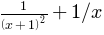

In [7]:
polysimp2((x**2 + 3*x + 1)/(x**3 + 2*x**2 + x))

## Powers

In each exercise, apply specific simplification functions to get the desired result. 

In [8]:
def powersimp1(expr):
    """
    >>> powersimp1(exp(x)*(exp(y) + 1))
    exp(x) + exp(x + y)
    """
    return powsimp(expand(expr))

In [9]:
powersimp1(exp(x)*(exp(y) + 1))

In [10]:
def powersimp2(expr):
    """
    >>> powersimp2(2**x*x**x)
    (2*x)**x
    >>> powersimp2(x**x*x**x)
    (x**2)**x
    """
    return powsimp(expr, force=True)

In [11]:
powersimp2(2**x*x**x)

In [12]:
powersimp2(x**x*x**x)

In [13]:
def powersimp3(expr):
    """
    >>> a, b, c = symbols('a b c')
    >>> powersimp3((a**b)**c)
    a**(b*c)
    >>> powersimp3((a**b)**(c + 1))
    a**(b*c + b)
    """
    return powdenest(expand_power_exp(expr), force=True)

In [14]:
a, b, c = symbols('a b c')
expand_power_exp((a**b)**(c + 1))

In [15]:
powersimp3((a**b)**c)

In [16]:
powersimp3((a**b)**(c + 1))

## Logs

In [17]:
def logsimp1(expr):
    """
    >>> a, b = symbols('a b', positive=True)
    >>> logsimp1(log(x**y*a**b))
    y*log(x) + log(a**b)
    >>> logsimp1(log(x*y*a*b))
    log(x) + log(y) + log(a*b)
    """
    return logcombine(expand_log(expr, force=True))

In [18]:
a, b = symbols('a b', positive=True)

In [19]:
logsimp1(log(x**y*a**b))

In [20]:
logsimp1(log(x*y*a*b))

## Miscellaneous  

In [21]:
def miscsimp1(expr):
    """
    >>> miscsimp1(sin(x + y))
    2*(-tan(x/2)**2 + 1)*tan(y/2)/((tan(x/2)**2 + 1)*(tan(y/2)**2 + 1)) + 2*(-tan(y/2)**2 + 1)*tan(x/2)/((tan(x/2)**2 + 1)*(tan(y/2)**2 + 1))
    """
    return expand_trig(expr).rewrite(tan)

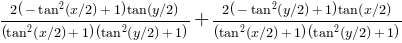

In [22]:
miscsimp1(sin(x + y))

In [23]:
def miscsimp2(expr):
    """
    >>> miscsimp2(gamma(x + 4))
    x**4*gamma(x) + 6*x**3*gamma(x) + 11*x**2*gamma(x) + 6*x*gamma(x)
    """
    return expand(expr, func=True)

In [24]:
miscsimp2(gamma(x + 4))

## Continued Fractions

If we do not cover this, see http://docs.sympy.org/latest/tutorial/simplification.html#example-continued-fractions

In [25]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr

In [26]:
a0, a1, a2, a3, a4 = symbols('a0:5')

Determine the list used to create the continued fraction $$\frac{a_{0} a_{1} a_{2} a_{3} a_{4} + a_{0} a_{1} a_{2} + a_{0} a_{3} a_{4} + a_{0} + a_{1} a_{2} a_{3} + a_{1} a_{3} a_{4} + a_{1} + a_{3}}{a_{0} a_{1} a_{2} a_{4} + a_{0} a_{4} + a_{1} a_{2} + a_{1} a_{4} + 1}.$$

In [27]:
def continued_frac():
    """
    Determine the original list used to create the fraction.  

    Return the original list from this function.

    >>> orig_frac = (a0*a1*a2*a3*a4 + a0*a1*a2 + a0*a3*a4 + a0 + a1*a2*a3 + a1*a3*a4 + a1 + a3)/(a0*a1*a2*a4 + a0*a4 + a1*a2 + a1*a4 + 1)
    >>> pprint(orig_frac)
    a₀⋅a₁⋅a₂⋅a₃⋅a₄ + a₀⋅a₁⋅a₂ + a₀⋅a₃⋅a₄ + a₀ + a₁⋅a₂⋅a₃ + a₁⋅a₃⋅a₄ + a₁ + a₃
    ─────────────────────────────────────────────────────────────────────────
                     a₀⋅a₁⋅a₂⋅a₄ + a₀⋅a₄ + a₁⋅a₂ + a₁⋅a₄ + 1
    >>> cancel(list_to_frac(continued_frac())) == orig_frac
    True
    """
    return [a3, a4, a0, a2, a1]

In [28]:
orig_frac = (a0*a1*a2*a3*a4 + a0*a1*a2 + a0*a3*a4 + a0 + a1*a2*a3 + a1*a3*a4 + a1 + a3)/(a0*a1*a2*a4 + a0*a4 + a1*a2 + a1*a4 + 1)

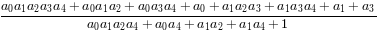

In [29]:
orig_frac

In [30]:
cancel(list_to_frac(continued_frac())) == orig_frac

True